# **ABOUT DATA**

## Import Libraries

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Data Preprocessing

Xóa những cột không gây ảnh hưởng đến kết quả huấn luyện

* Id (Mã định danh)

* Age (Tuổi)

* City ( Thành phố)

* Profession (nghề nghiệp)

* Work Pressure(Áp lực công việc)

* Job Satisfaction ( Công việc)

* Degree ( Bằng cấp)

In [47]:
# Load data
dp_data = pd.read_csv('D:/Do_an_tot_nghiep/Machine_Learning/code/Student_Depression_data.csv')
dp_data.head()

,Gioi tinh,Ap luc hoc tap,CGPA (TB tich luy),Muc do hai long trong hoc tap,Thoi gian ngu,Thoi quen an uong,Da tung co y dinh tu tu chua,So gio hoc,Cang thang tai chinh,Tien su gia dinh mac benh tram cam,Tram cam
0,1,5,8.97,2,2,3,1,3,1,0,1
1,0,2,5.90,5,2,2,0,3,2,1,0
2,1,3,7.03,5,1,3,0,9,1,1,0
3,0,3,5.59,2,3,2,1,4,5,1,1
4,0,4,8.13,3,2,2,1,1,1,0,0


In [48]:
result = dp_data[dp_data['Ap luc hoc tap'] == 5].sum()
print(result)

Gioi tinh                              125.0
Ap luc hoc tap                        1225.0
CGPA (TB tich luy)                    1844.3
Muc do hai long trong hoc tap          643.0
Thoi gian ngu                          560.0
Thoi quen an uong                      451.0
Da tung co y dinh tu tu chua           191.0
So gio hoc                            1867.0
Cang thang tai chinh                   827.0
Tien su gia dinh mac benh tram cam     124.0
Tram cam                               209.0
dtype: float64


* Giới tính - Giới tính của học sinh  Nam = 1, Nữ = 0  
* Áp lực học tập - Mức độ áp lực trong học tập (thang điểm số, giá trị càng cao thể hiện áp lực càng lớn, 5-4-3-2-1) 
* CGPA (TB tích lũy) - Điểm trung bình tích lũy của sinh viên  
* Mức độ hài lòng trong học tập - Mức độ hài lòng với việc học (thang điểm số, giá trị càng cao thể hiện áp lực càng lớn, 5-4-3-2-1) 
* Thời gian ngủ - 4 = Trên 8 tiếng, 3 = 7-8 tiếng, 2 = 5-6 tiếng, 1 = Dưới 5 tiếng  
* Thói quen ăn uống - 3 = Lành mạnh, 2 = Trung bình, 1 = Không lành mạnh  
* Đã từng có ý định tự tử chưa ? - 1 = Có, 0 = Không  
* Số giờ học - Số giờ học mỗi ngày  
* Căng thẳng tài chính - (thang điểm số, giá trị càng cao thể hiện áp lực càng lớn, 5-4-3-2-1) 
* Tiền sử gia đình có người mắc bệnh trầm cảm - 1 = Có, 0 = Không  

* Kết quả trầm cảm, 1 = Trầm cảm, 0 = Không trầm cảm



In [49]:
# Kiểm tra thông tin dữ liệu
print(dp_data.info())

# Kiểm tra giá trị thiếu, xác định kiểu dữ liệu
missing_values = dp_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gioi tinh                           1000 non-null   int64  
 1   Ap luc hoc tap                      1000 non-null   int64  
 2   CGPA (TB tich luy)                  1000 non-null   float64
 3   Muc do hai long trong hoc tap       1000 non-null   int64  
 4   Thoi gian ngu                       1000 non-null   int64  
 5   Thoi quen an uong                   1000 non-null   int64  
 6   Da tung co y dinh tu tu chua        1000 non-null   int64  
 7   So gio hoc                          1000 non-null   int64  
 8   Cang thang tai chinh                1000 non-null   int64  
 9   Tien su gia dinh mac benh tram cam  1000 non-null   int64  
 10  Tram cam                            1000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 86.1 

- => Không có giá trị nào bị thiếu

In [50]:
# Thống kê tóm tắt thông số dữ liệu
print("\nSummary Statistics (Numerical Columns):")
dp_data.describe()


Summary Statistics (Numerical Columns):


,Gioi tinh,Ap luc hoc tap,CGPA (TB tich luy),Muc do hai long trong hoc tap,Thoi gian ngu,Thoi quen an uong,Da tung co y dinh tu tu chua,So gio hoc,Cang thang tai chinh,Tien su gia dinh mac benh tram cam,Tram cam
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.542000,3.172000,7.649270,2.905000,2.380000,1.884000,0.64000,7.146000,3.080000,0.477000,0.589000
std,0.498482,1.418601,1.467314,1.344538,1.120203,0.777913,0.48024,3.727812,1.456613,0.499721,0.492261
min,0.000000,1.000000,5.060000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,6.267500,2.000000,1.000000,1.000000,0.00000,4.000000,2.000000,0.000000,0.000000
50%,1.000000,3.000000,7.770000,3.000000,2.000000,2.000000,1.00000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,4.000000,8.942500,4.000000,3.000000,3.000000,1.00000,10.000000,4.000000,1.000000,1.000000
max,1.000000,5.000000,10.000000,5.000000,4.000000,3.000000,1.00000,12.000000,5.000000,1.000000,1.000000


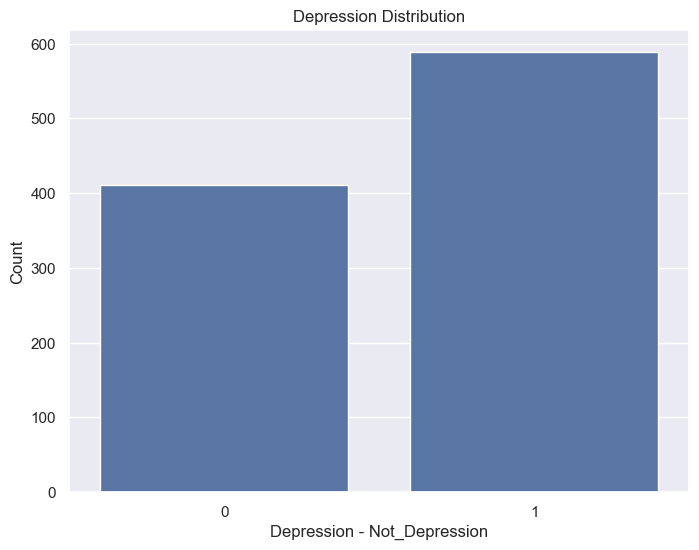

In [51]:
# Biểu đồ phân phối kết quả bệnh trầm cảm
plt.figure(figsize=(8, 6))
sns.countplot(x='Tram cam', data=dp_data)
plt.title('Depression Distribution')
plt.xlabel('Depression - Not_Depression')
plt.ylabel('Count')
plt.show()

In [52]:
# # Biểu đồ phân bố giới tính
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Gioi tinh', data=dp_data)
# plt.title('Gender Distribution')
# plt.xlabel('Sex (0 = Female, 1 = Male)')
# plt.ylabel('Count')
# plt.show()

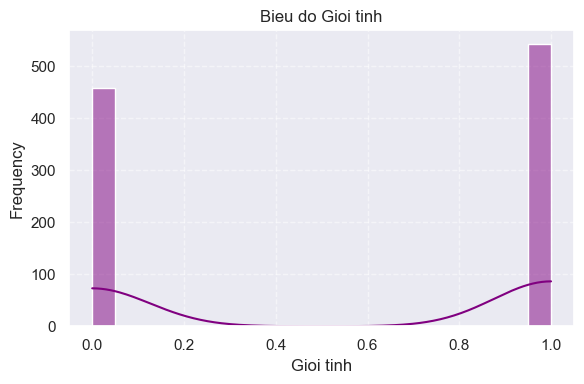

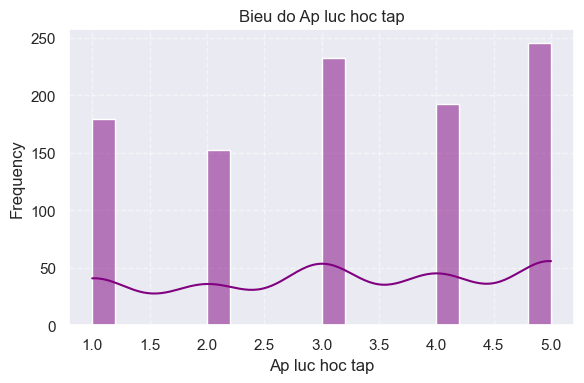

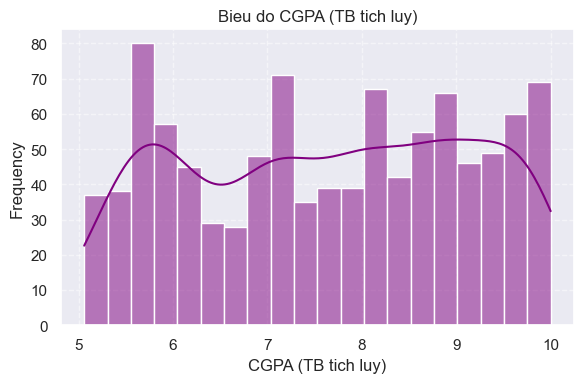

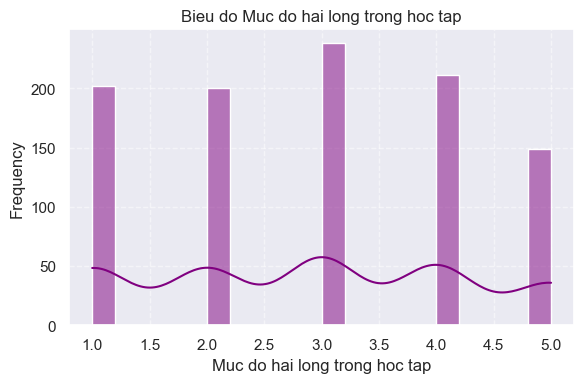

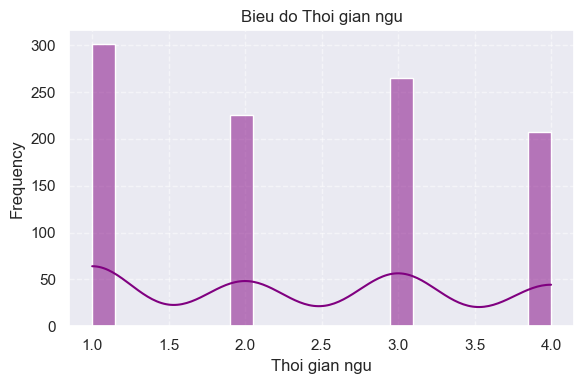

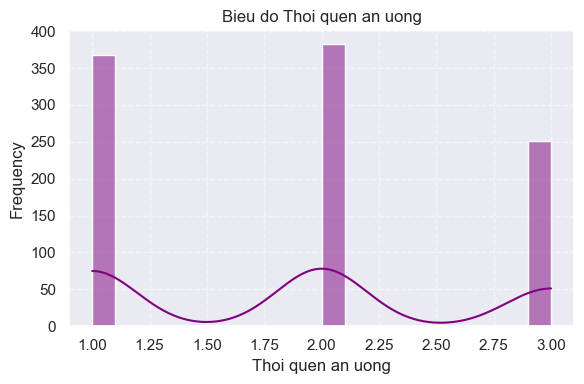

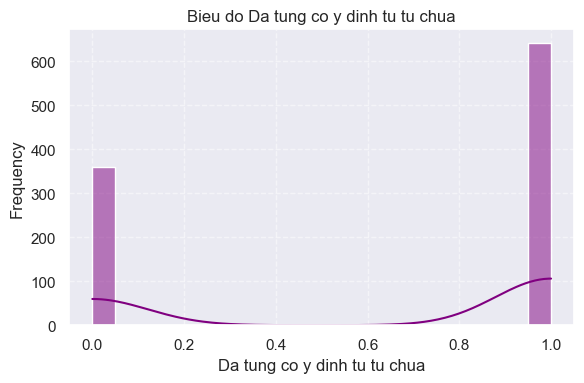

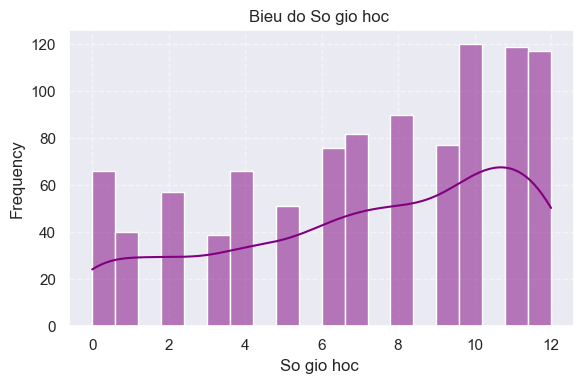

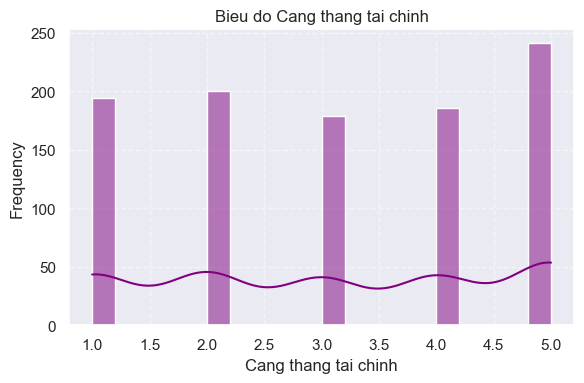

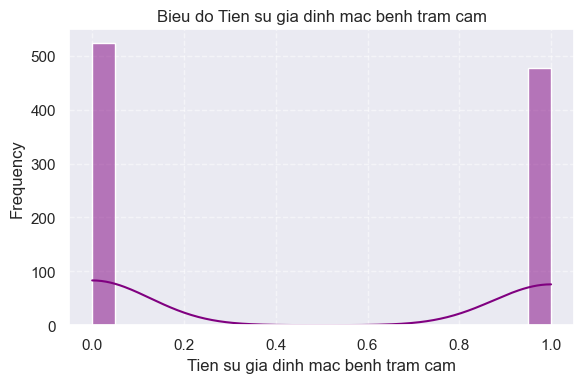

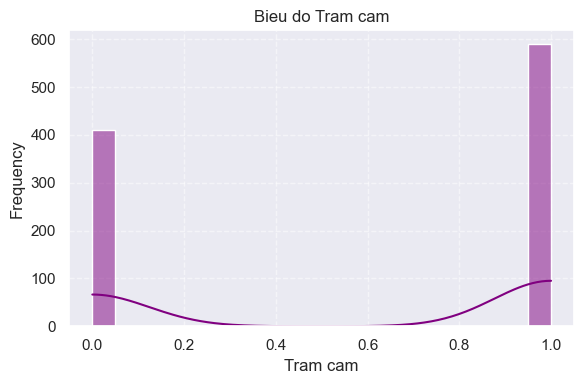

In [53]:
# Lấy tất cả các cột dạng số (int, float)
numerical_columns = dp_data.select_dtypes(include=['float64', 'int64']).columns

# Tạo biểu đồ phân phối (histogram + KDE) cho từng cột số
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(dp_data[col], kde=True, color='purple', bins=20)
    plt.title(f'Bieu do {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

* Trực quan xem dữ liệu dạng số (numerical) được phân bổ trong tập dữ liệu.

* Dùng để hiểu đặc điểm của dữ liệu đầu vào trước khi đưa vào mô hình học máy, giúp chọn mô hình phù hợp cho bài toán.

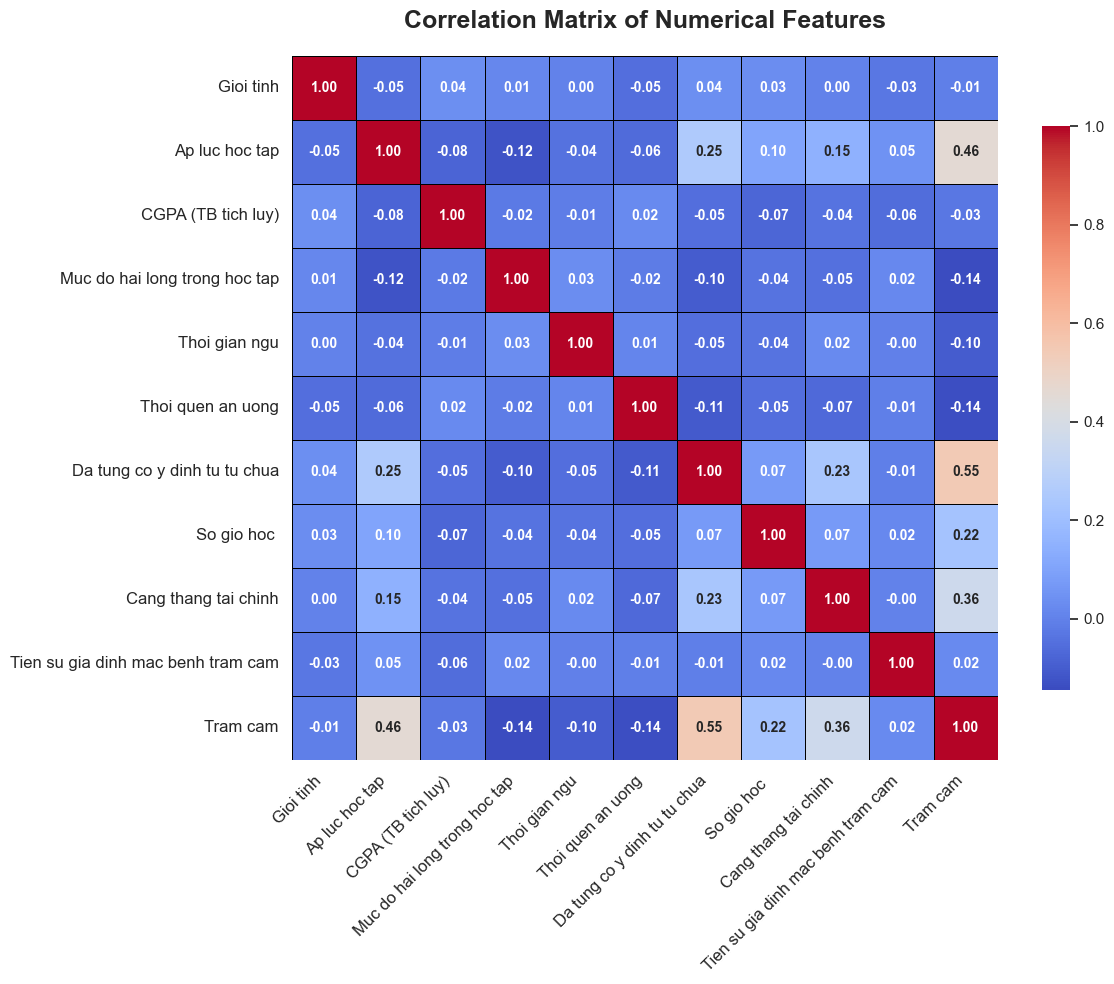

In [ ]:
# Phân tích tương quan giữa các cột dữ liệu
numerical_data = dp_data.select_dtypes(include=['float64', 'int64'])  # Chọn chỉ các cột số
correlation_matrix = numerical_data.corr()  # Tính ma trận tương quan

# Thiết lập hình vẽ và kiểu dáng
plt.figure(figsize=(12, 10)) 
sns.set_style("white")  

# Vẽ biểu đồ heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,  
    cmap='coolwarm',  
    fmt='.2f',  
    linewidths=0.5,  
    linecolor='black',  
    cbar_kws={'shrink': 0.8}, 
    annot_kws={'size': 10, 'weight': 'bold'} 
)

# Tùy chỉnh tiêu đề và nhãn trục
plt.title('Correlation Matrix of Numerical Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')  
plt.yticks(fontsize=12)
plt.tight_layout()  

# Hiển thị biểu đồ
plt.show()
